In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# csv 파일 읽어오기

In [78]:
de_facto_population = pd.read_csv('서울시 상권분석서비스(상권-생활인구).csv',encoding='euc-kr')

In [79]:
de_facto_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40041 entries, 0 to 40040
Columns: 532 entries, 기준 년코드 to 여성연령대_60_이상_일요일시간대_6_생활인구_수
dtypes: int64(529), object(3)
memory usage: 162.5+ MB


# 데이터를 합친 새로운 컬럼 생성하기

## 각 연령대의 시간별, 요일별 생활인구수로 나눠진 컬럼을 더하여 여성, 남성의 각 연령대별 생활 인구 수 컬럼 생성하기

In [80]:
for idx in range(1,7):
    if idx == 6:
        de_facto_population[f'남성{idx}0대이상'] = de_facto_population.loc[:,f'남성연령대_{idx}0_이상_월요일시간대_1_생활인구_수':f'남성연령대_{idx}0_이상_일요일시간대_6_생활인구_수'].T.sum()
        de_facto_population[f'여성{idx}0대이상'] = de_facto_population.loc[:,f'여성연령대_{idx}0_이상_월요일시간대_1_생활인구_수':f'여성연령대_{idx}0_이상_일요일시간대_6_생활인구_수'].T.sum()
        break
    de_facto_population[f'남성{idx}0대'] = de_facto_population.loc[:,f'남성연령대_{idx}0_월요일시간대_1_생활인구_수':f'남성연령대_{idx}0_일요일시간대_6_생활인구_수'].T.sum()
    de_facto_population[f'여성{idx}0대'] = de_facto_population.loc[:,f'여성연령대_{idx}0_월요일시간대_1_생활인구_수':f'여성연령대_{idx}0_일요일시간대_6_생활인구_수'].T.sum()

# 컬럼명 변경하기

In [81]:
de_facto_population.rename(columns={'기준 년코드': '연도',
                             '기준_분기_코드': '분기',
                             ' 상권_구분_코드_명':'상권구분',
                             '상권_코드_명':'상권명',
                             '총_생활인구_수':'총생활인구',
                             '남성_생활인구_수':'남성',
                             '여성_생활인구_수':'여성',
                             '연령대_10_생활인구_수':'10대',
                            '연령대_20_생활인구_수':'20대',
                            '연령대_30_생활인구_수':'30대',
                            '연령대_40_생활인구_수':'40대',
                            '연령대_50_생활인구_수':'50대',
                            '연령대_60_이상_생활인구_수':'60대이상',
                            '월요일_생활인구_수':'월요일',
                            '화요일_생활인구_수':'화요일',
                            '수요일_생활인구_수':'수요일',
                            '목요일_생활인구_수':'목요일',
                            '금요일_생활인구_수':'금요일',
                            '토요일_생활인구_수':'토요일',
                            '일요일_생활인구_수':'일요일'},inplace=True)

#  필요한 컬럼만 데이터 프레임에 저장하기

In [82]:
de_facto_population = de_facto_population.loc[:,['연도','분기','상권구분','상권명','총생활인구','남성','여성',
                         '10대','20대','30대','40대','50대','60대이상',
                        '남성10대','남성20대','남성30대','남성40대','남성50대','남성60대이상',
                        '여성10대','여성20대','여성30대','여성40대','여성50대','여성60대이상',
                        '월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

# 데이터 전처리 완료한 결과 csv 파일로 저장하기

In [83]:
de_facto_population.to_csv('de_facto_population.csv',index=False,encoding='utf-8')

## 전처리 완료한 csv 파일 가져오기

In [84]:
de_facto_population = pd.read_csv('de_facto_population.csv')

# 가설

## 가설 1) 코로나로 인하여 생활 반경이 좁아짐에 따라 골목상권의 평균 총생활인구의 증가율이 발달상권과 전통시장, 관광특구의 평균 총생활인구의 증가율보다 더 높을 것이다.

In [85]:
# 각 연도의 분기별, 상권별 총 생활인구수 평균 구하기
g_average_population_byarea = de_facto_population.groupby(['연도','분기','상권구분']).총생활인구.mean().unstack()

In [86]:
# 증가율데이터 추가 위한 데이터 프레임 생성
increase_rate_byarea = pd.DataFrame()

In [106]:
# 데이터 추가하기
area_values = ['골목상권', '관광특구', '발달상권', '전통시장']

for area in area_values:
    increase_rate_byarea[area] = (g_average_population_byarea[area] - g_average_population_byarea[area].shift())/g_average_population_byarea[area].shift()*100
    
increase_rate_byarea.dropna(how='all',inplace=True)

### 가설 검증을 위한 시각화

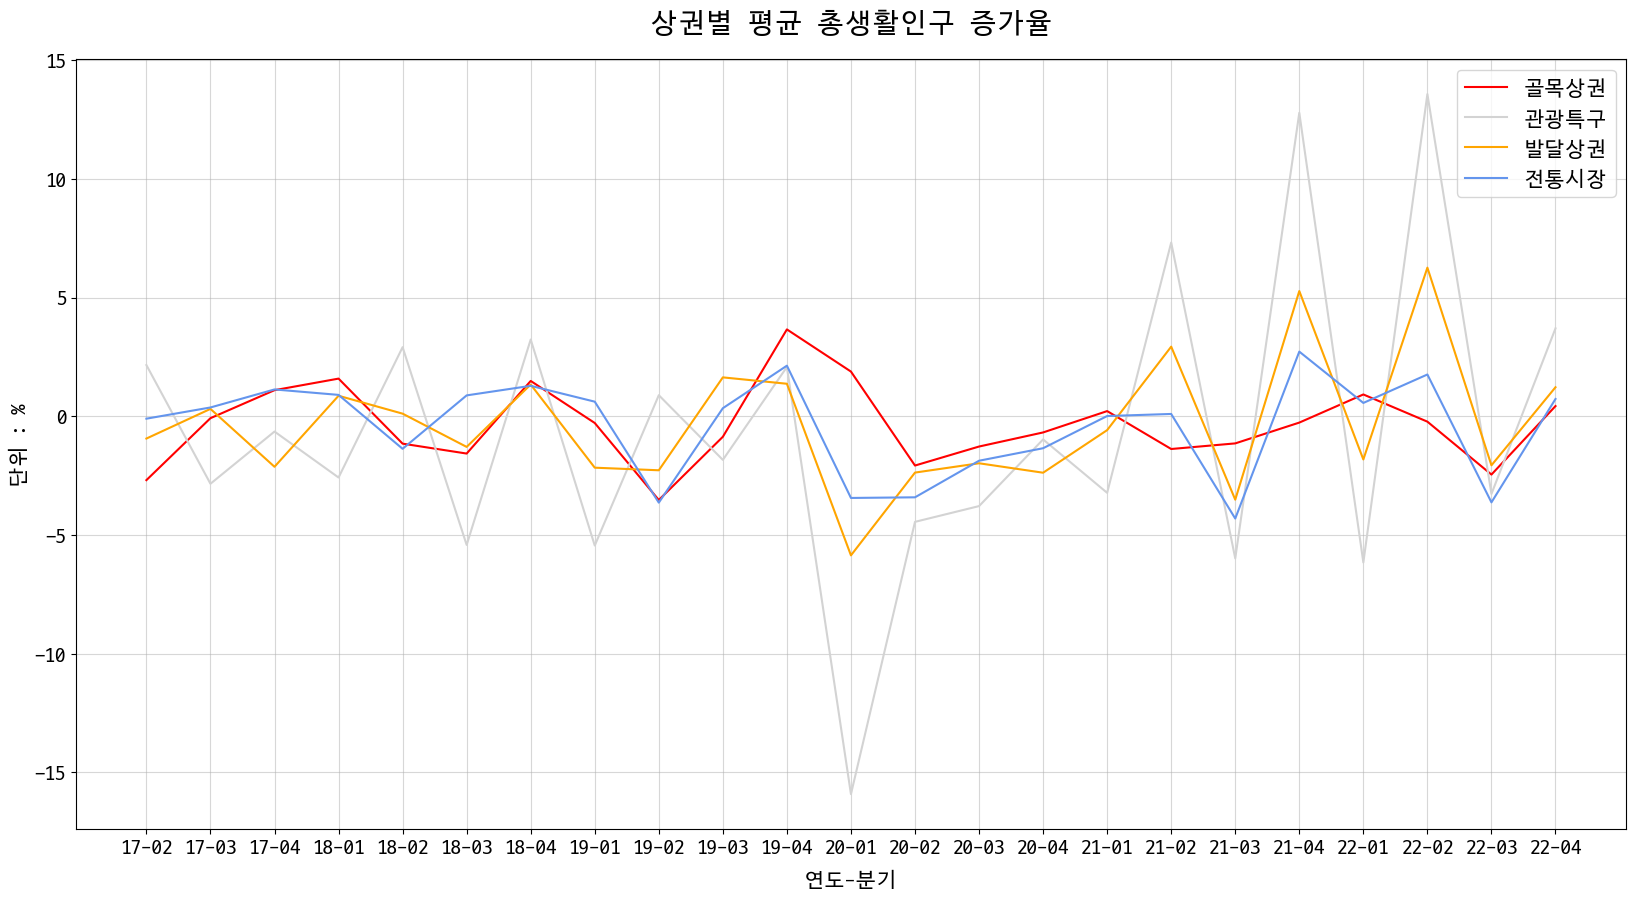

In [89]:
# 한글깨짐 방지
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 15

# x축 값 생성
xticks=list()
for y in range(17,23):
    for q in range(1,5):
        xticks.append(f'{y}-0{q}')

# 그래프 그리기
fig = increase_rate_byarea.plot(xticks=range(len(increase_rate_byarea.index)),
                                color=['red','lightgrey','orange','cornflowerblue'],
                                ylabel='단위 : %',
                                figsize=(20,10))
fig.set_xticklabels(xticks[1:])
plt.xlabel('연도-분기',labelpad=10,fontdict={'fontsize':15})
plt.title('상권별 평균 총생활인구 증가율',pad=20,fontdict={'fontsize':20})
fig.grid(alpha=0.5)
plt.savefig('상권별 평균 총생활인구 증가율.jpg')
plt.show()

In [90]:
# 서울의 분기별 코로나 확진자 데이터와 비교
covid19_seoul = pd.read_csv('서울시 코로나19 자치구별 확진자 발생동향.csv',encoding='cp949')
columns = [column for column in covid19_seoul.columns if column.endswith('전체')]

total_covid19_seoul = pd.DataFrame({'자치구기준일':covid19_seoul['자치구 기준일'].str[:-3],'누적확진자수': covid19_seoul[columns].T.sum()})

index = list()
for y in range(0,3):
    for q in range(1,5):
        index.append(f'2{y}-0{q}')

covid19_seoul_byquater = pd.DataFrame([total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2020.03.31'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2020.06.30'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2020.09.30'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2020.12.31'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2021.03.31'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2021.06.30'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2021.09.30'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2021.12.31'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2022.03.31'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2022.06.30'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2022.09.30'].누적확진자수.values,
                                       total_covid19_seoul[total_covid19_seoul.자치구기준일 == '2022.12.31'].누적확진자수.values,],
                                     index=index,columns=['누적확진자수'])

covid19_seoul_byquater['분기별확진자수'] = covid19_seoul_byquater['누적확진자수'] - covid19_seoul_byquater['누적확진자수'].shift().fillna(0).astype(int)

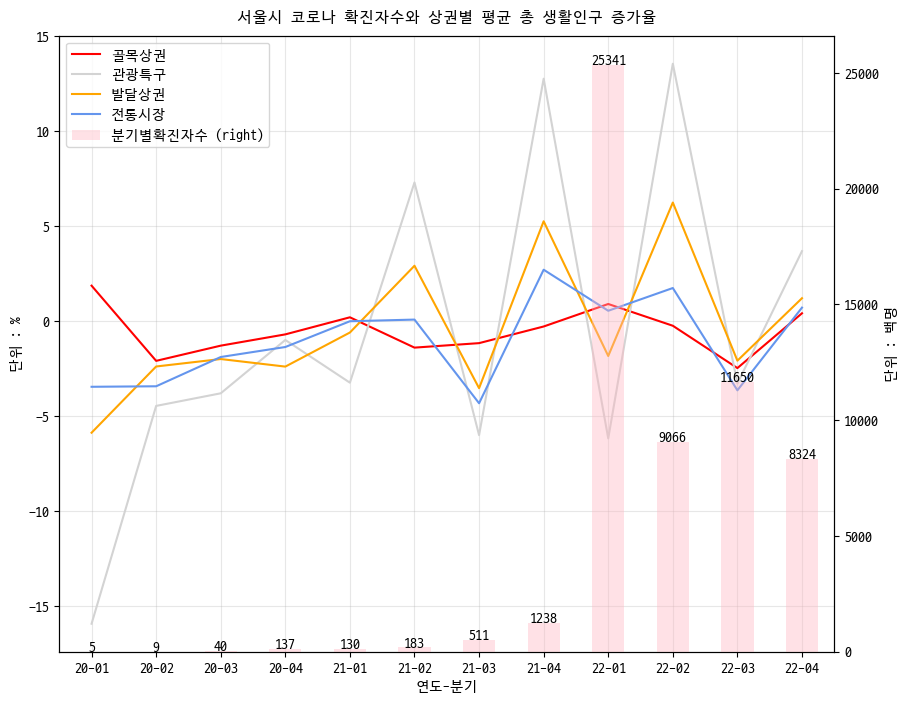

In [92]:
plt.rcParams['font.size'] = 10
increase_rate_byarea[11:].plot(color=['red','lightgrey','orange','cornflowerblue'],
                              ylabel= '단위 : %')
plt.grid(alpha=0.3)
fig = (covid19_seoul_byquater.분기별확진자수/100).plot(kind='bar',
                                    secondary_y=True,
                                    legend=True,
                                    color='lightpink',
                                    alpha=0.4,
                                    xlabel='연도-분기',
                                    rot=0,
                                    ylabel='단위 : 백명',
                                    figsize=(10,8)
                                   )
for p in fig.patches:
    fig.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height(), # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') # 가운데 정렬

plt.title('서울시 코로나 확진자수와 상권별 평균 총 생활인구 증가율',fontdict={'fontsize':11},pad=10)
plt.savefig('서울시 코로나 확진자수와 각 상권별 평균 총 생활인구 증가율.jpg')
plt.show()

### 가설 검증
-  가설 1) 코로나로 인하여 생활 반경이 좁아짐에 따라 골목상권의 평균 총생활인구의 증가율이 발달상권과 전통시장, 관광특구의 평균 총생활인구의 증가율보다 더 높을 것이다.<br><br>
    - 코로나가 발병한 2020년도 1분기에는 골목상권을 제외한 모든 상권의 평균 총 생활인구 수는 감소하였지만 골목상권은 약 1.88% 평균 총 생활 인구수가 증가하였다. 
    - 하지만 그 이후 골목상권의 평균 생활 인구수는 꾸준히 증가 하지 않았고 완만한 그래프의 기울기로 보아 크게 증가하지도 크게 감소하지도 않았다. 그에 반해 다른 상권들은 관광특구, 발달상권, 전통시장 순으로 증가율 그래프의 기울기가 급격하게 바뀌며 평균 총 생활인구의 급격한 증가와 감속이 반복되었다.<br>따라서, 코로나가 발병한 2020년도 1분기의 골목 상권의 평균 총 생활 인구수는 다른 상권에 비해 증가하였으나 그 이후로는 오히려 다른 상권들의 평균 총 생활인구 수가 증가한 적이 더 많아 가설은 틀린 것으로 확인되었다.
    - 21년도 이후부터 각 상권의 평균 총 생활인구 증가율이 급격하게 상승하고 감소하는 것을 파악하기 위해 20년도부터 서울의 분기별 코로나 확진자 수와 비교해보았다. 22년도부터는 코로나 확진자수가 크게 증가하였을 때 생활 인구 증가율이 크게 감소하고, 확진자수가 이전 분기보다 감소 하였을 때 생활인수 증가율이 크게 상승하는 것을 확인할 수 있었다. 이는, 코로나 확진자수가 아주 급격하게 증가함에 따라 사회적 거리두기 단계 격상으로 인하여 사람들이 외부 활동을 자제하면서 상권의 생활인구가 줄어들었기 때문이었다.

## 가설 2) MZ세대인 2,30대의 생활인구의 평균은 전통시장의 값이 골목상권과 발달상권의 값보다 더 낮을 것이다.

In [93]:
mz_population = de_facto_population.loc[:,['연도','분기','상권구분']]

mz_population['MZ세대생활인구'] = (de_facto_population.loc[:,'20대']+de_facto_population.loc[:,'30대'])/10000

### 가설 검증을 위한 시각화

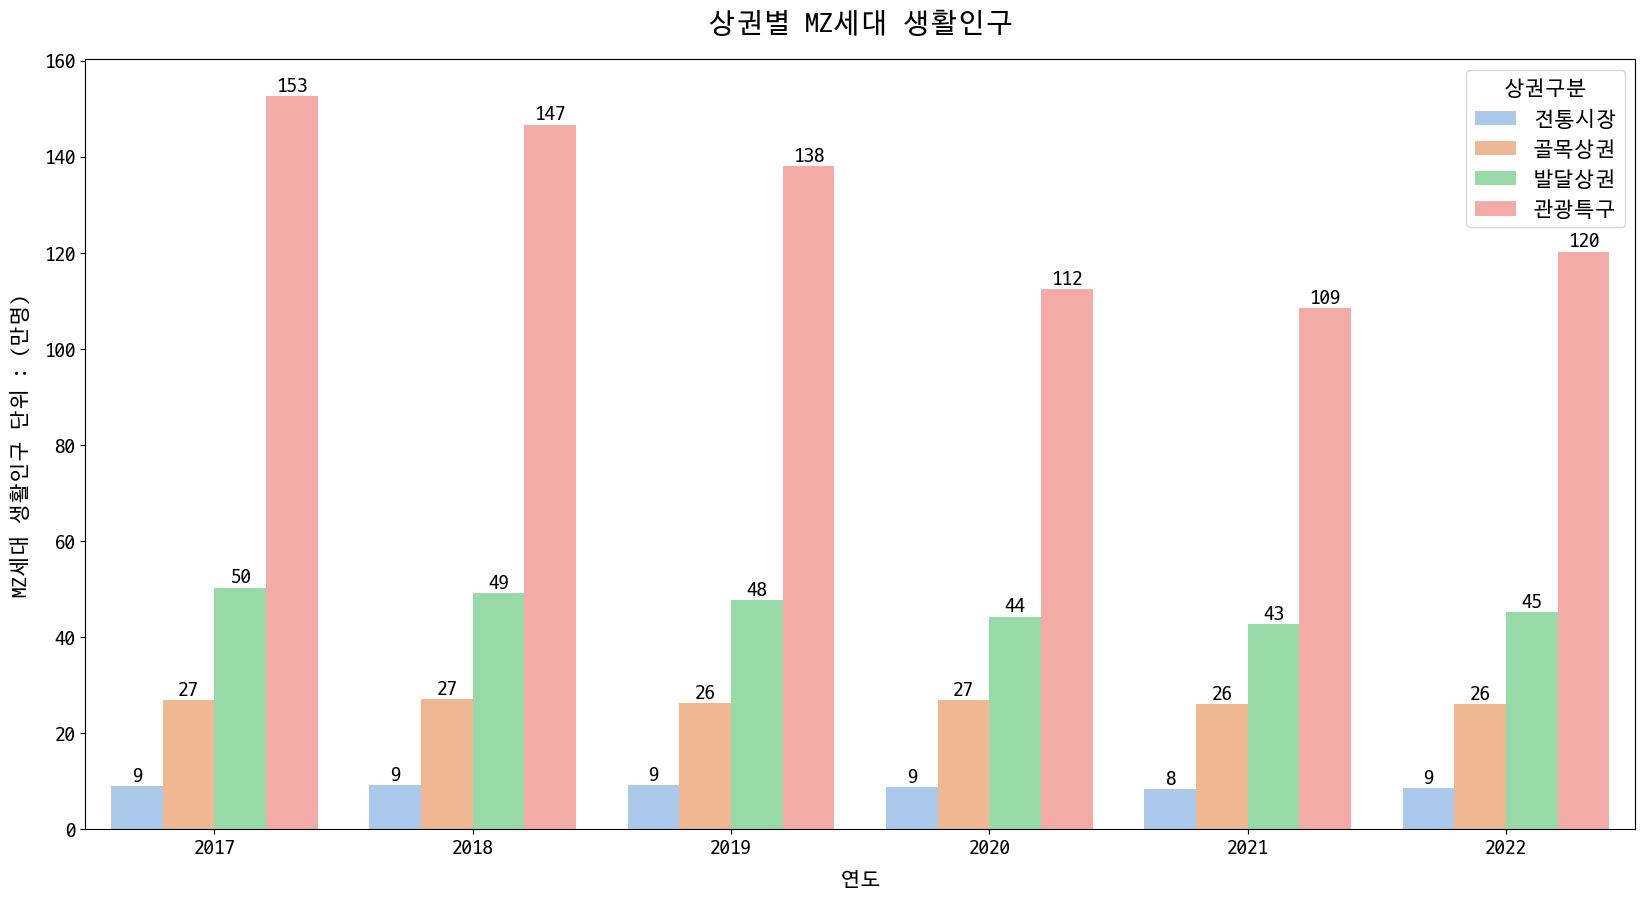

In [95]:
plt.rcParams['font.size'] = 15
ax = sns.barplot(mz_population,
            x='연도',
            y='MZ세대생활인구',
            hue='상권구분',
            hue_order=['전통시장','골목상권','발달상권','관광특구'],
            errorbar=None,
            palette='pastel'
           )
ax.figure.set_size_inches(20,10)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height()+1, # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') # 가운데 정렬
plt.xlabel('연도',labelpad=10,fontdict={'fontsize':15})
plt.ylabel('MZ세대 생활인구 단위 : (만명)',labelpad=10,fontdict={'fontsize':15})
plt.title('상권별 MZ세대 생활인구',pad=20,fontdict={'fontsize':20})
plt.savefig('상권별 MZ세대 생활인구.jpg')
plt.show()

### 가설 검증
- 가설 2) MZ세대인 2,30대의 총 생활인구의 평균은 전통시장의 값이 골목상권과 발달상권의 값보다 더 낮을 것이다.<br><br>
    - 2017년도부터 2022년도까지 모든 시기의 2,30대의 총 생활인구의 평균 값은 전통시장, 골목상권, 발달상권, 관광특구 순으로 그 인구가 많았던 것으로 확인되었다. 따라서 2,30대의 총 생활인구의 평균은 골목상권과 발달상권의 값보다 낮을 것이라는 가설이 맞는 것으로 검증되었다.   

## 가설3) 2022년도의 남성과 여성의 각 연령대별 각 상권의 평균 생활 인구의 비율은 발달상권이 높은 비율을 차지할 것이다.

In [96]:
g_area_2022 = de_facto_population[de_facto_population['연도']==2022].groupby('상권구분')
population_2022_by_gender = pd.DataFrame({
    '남성10대':g_area_2022.남성10대.mean(),
    '남성20대':g_area_2022.남성20대.mean(),
    '남성30대':g_area_2022.남성30대.mean(),
    '남성40대':g_area_2022.남성40대.mean(),
    '남성50대':g_area_2022.남성50대.mean(),
    '남성60대이상':g_area_2022.남성60대이상.mean(),
    '여성10대':g_area_2022.여성10대.mean(),
    '여성20대':g_area_2022.여성20대.mean(),
    '여성30대':g_area_2022.여성30대.mean(),
    '여성40대':g_area_2022.여성40대.mean(),
    '여성50대':g_area_2022.여성50대.mean(),
    '여성60대이상':g_area_2022.여성60대이상.mean()    
})

### 가설 검증을 위한 시각화

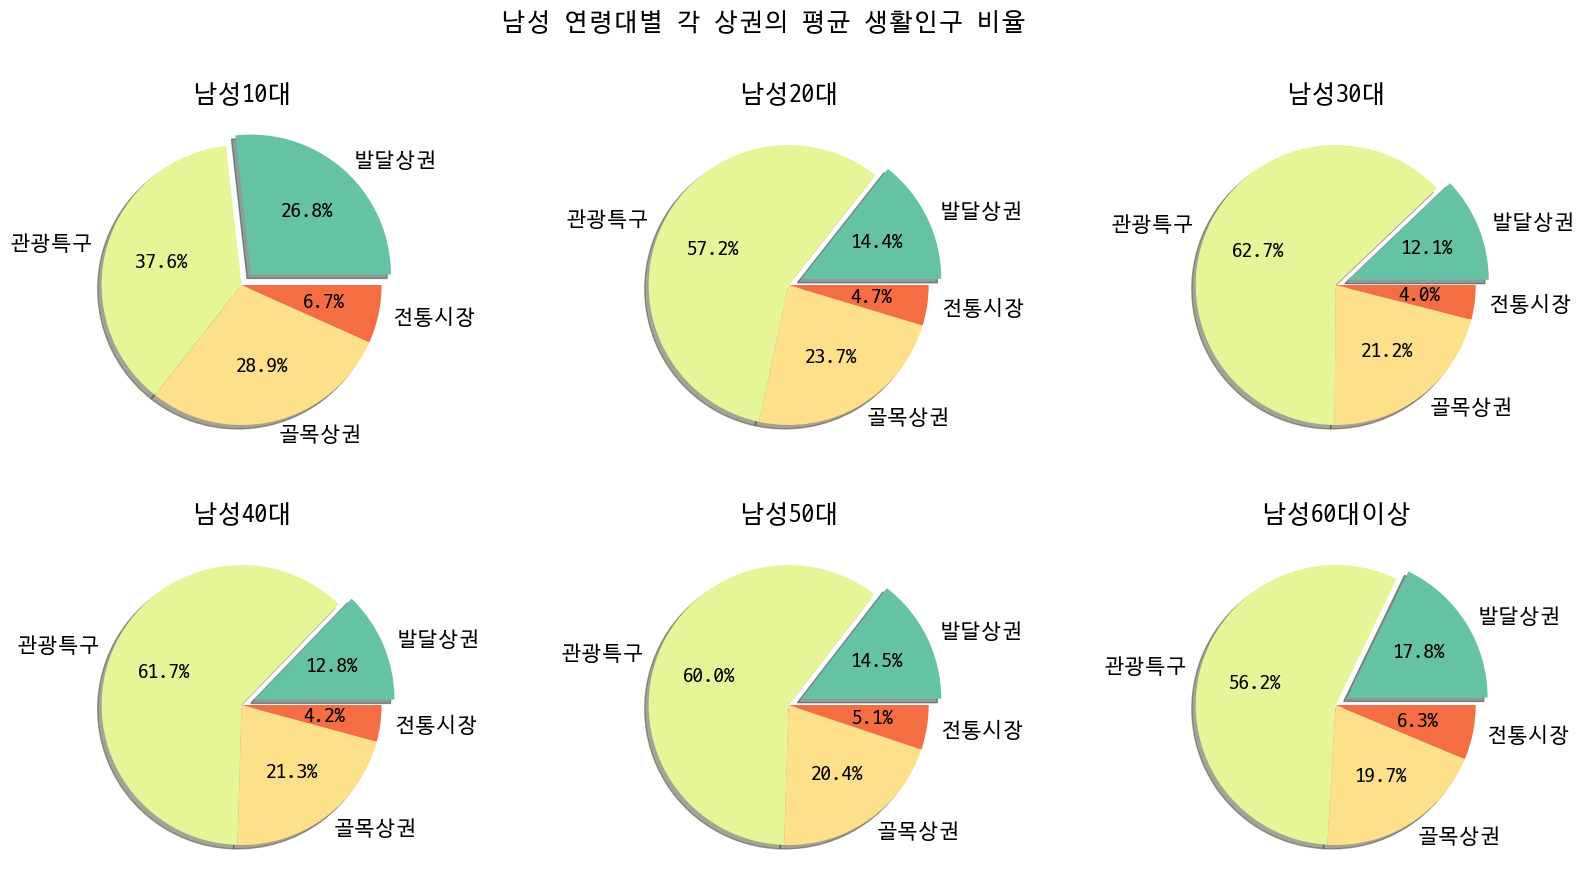

In [97]:
labels=['발달상권','관광특구','골목상권','전통시장']
colors = sns.color_palette('Spectral_r',len(labels))

fig, ax = plt.subplots(2,3)
fig.set_size_inches(20,10) 
#남성10대
ax[0][0].pie(population_2022_by_gender['남성10대'],
             autopct='%.1f%%',
             explode=[0.1,0,0,0],
             labels=labels,
             colors=colors,
             shadow=True,
            )
ax[0][0].set_title('남성10대')

#남성20대
ax[0][1].pie(population_2022_by_gender['남성20대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[0][1].set_title('남성20대')

#남성30대
ax[0][2].pie(population_2022_by_gender['남성30대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[0][2].set_title('남성30대')

#남성40대
ax[1][0].pie(population_2022_by_gender['남성40대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[1][0].set_title('남성40대')

#남성50대
ax[1][1].pie(population_2022_by_gender['남성50대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[1][1].set_title('남성50대')

#남성60대이상
ax[1][2].pie(population_2022_by_gender['남성60대이상'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[1][2].set_title('남성60대이상')
plt.suptitle('남성 연령대별 각 상권의 평균 생활인구 비율')
plt.savefig('남성 연령대별 각 상권의 평균 생활인구 비율.jpg')
plt.show()

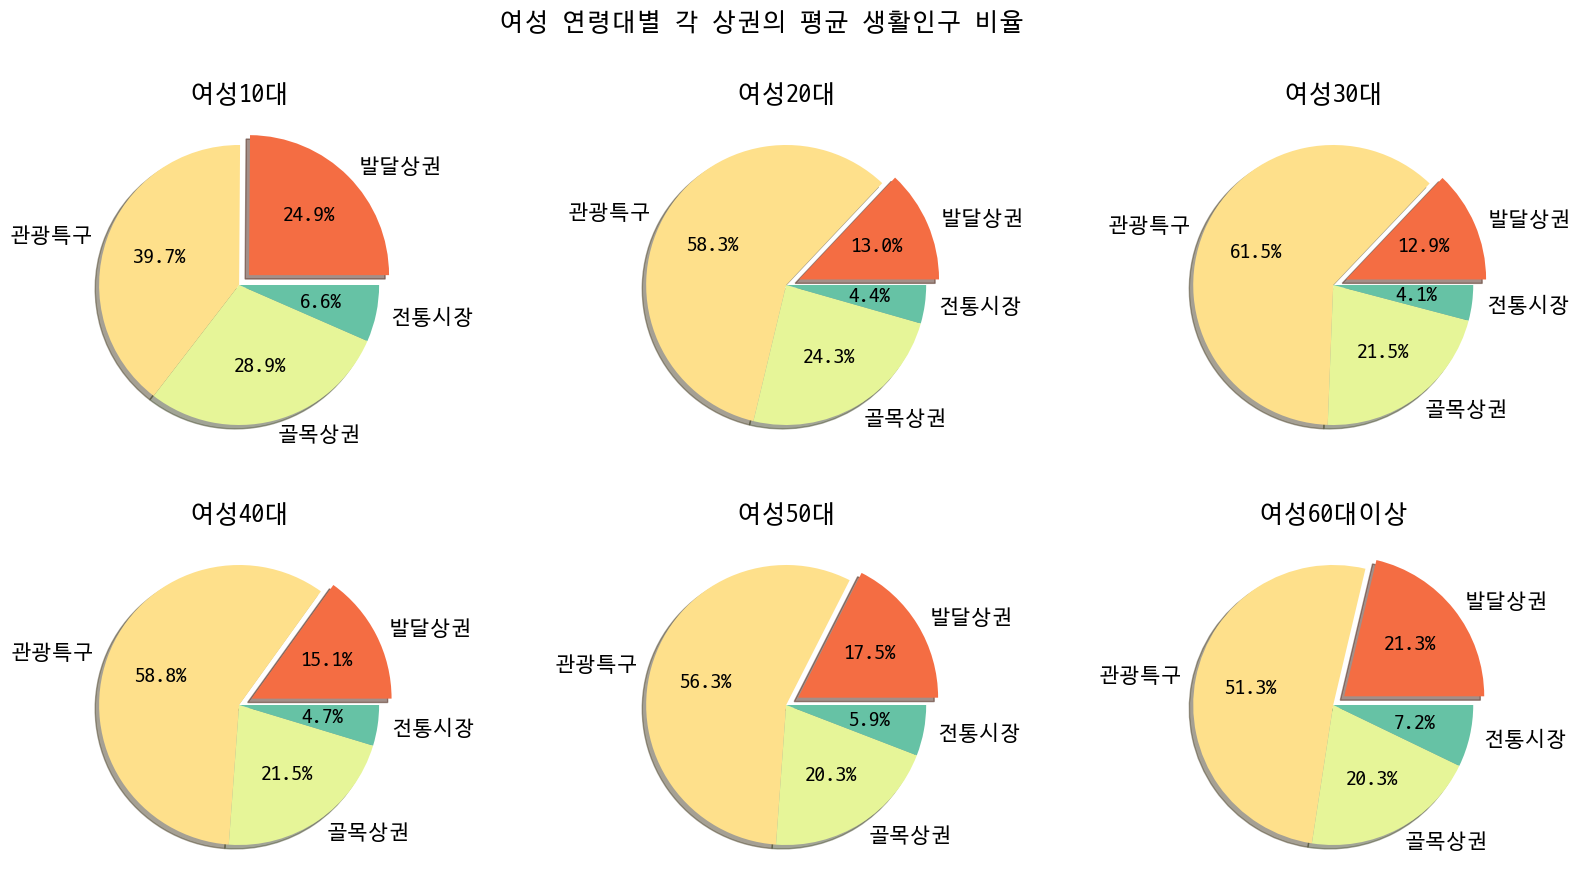

In [98]:
colors = sns.color_palette('Spectral',len(labels))

fig, ax = plt.subplots(2,3)
fig.set_size_inches(20,10) 
#여성10대
ax[0][0].pie(population_2022_by_gender['여성10대'],
             autopct='%.1f%%',
             explode=[0.1,0,0,0],
             labels=labels,
             colors=colors,
             shadow=True,
            )
ax[0][0].set_title('여성10대')

#여성20대
ax[0][1].pie(population_2022_by_gender['여성20대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[0][1].set_title('여성20대')

#여성30대
ax[0][2].pie(population_2022_by_gender['여성30대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[0][2].set_title('여성30대')

#여성40대
ax[1][0].pie(population_2022_by_gender['여성40대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[1][0].set_title('여성40대')

#여성50대
ax[1][1].pie(population_2022_by_gender['여성50대'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[1][1].set_title('여성50대')

#여성60대이상
ax[1][2].pie(population_2022_by_gender['여성60대이상'],
          autopct='%.1f%%',
          explode=[0.1,0,0,0],
          labels=labels,
          colors=colors,
          shadow=True,
       )
ax[1][2].set_title('여성60대이상')
plt.suptitle('여성 연령대별 각 상권의 평균 생활인구 비율')
plt.savefig('여성 연령대별 각 상권의 평균 생활인구 비율.jpg')
plt.show()

### 가설 검증
- 가설3) 2022년도의 남성과 여성의 각 연령대별 각 상권의 평균 생활 인구의 비율은 발달상권이 높은 비율을 차지할 것이다.<br><br>
    - 남성의 연령대 별 각 상권의 평균 생활인구는 모든 연령대에서 관광 특구가 높은 비율을 차지 하였고, 골목상권, 발달상권, 전통시장 순으로 확인되었다.<br>발달 상권의 각 연령대별 생활인구 비율은 남성 10대에서만 26.8%로 2위인 골목상권과 비슷한 수치를 보였고 나머지 연령대에서는 모두 10%대를 차지하였다.
    - 여성의 연령대 별 각 상권의 평균 생활인구는 60대 이상을 제외하고 모든 연령대에서 관광 특구가 가장 높은 비율을 차지 하였고, 골목상권, 발달상권, 전통시장 순으로 확인되었다. 발달 상권의 각 연령대별 생활인구 비율은 여성 10대와 60대 이상에서만 각각 24.9%, 21.3%로 골목상권과 비슷한 수치를 보였고 나머지 연령대에서는 모두 10%대를 차지하였다.
    - 따라서 2022년도의 상권 별 평균 생활인구 비율이 가장 높은 곳은 관광특구이었고, 60대 이상의 여성에서만 발달 상권 비율이 2순위를 차지한 것으로 확인되어 가설은 맞지 않은 것으로 검증 되었다.


## 가설4) 2022년도 생활인구의 평균값이 가장 높은 20곳 중 주중 생활인구 평균값이 높은 곳은 발달상권이 더 많을 것이고 주말 생활인구 평균값이 높은 곳은 골목상권이 더 많을 것이다.

In [99]:
population_2022_byday = de_facto_population[de_facto_population['연도']==2022][['분기','상권구분','상권명']]

In [100]:
population_2022_byday['주중생활인구'] = de_facto_population.loc[:,'월요일':'금요일'].T.sum()/5
population_2022_byday['주말생활인구'] = de_facto_population.loc[:,'토요일':'일요일'].T.sum()/2

In [102]:
# 주중생활인구 Top 20 상권
population_weekdays = population_2022_byday.groupby(['상권구분','상권명']).주중생활인구.mean().sort_values(ascending=False)[:20].to_frame()
population_weekdays

주중생활인구
상권구분 상권명                                 
발달상권 강남역                       1009813.25
골목상권 까치산역 3번                    845935.40
발달상권 선릉역                        777293.45
     신촌역(신촌역, 신촌로터리)            752394.15
골목상권 화곡역 4번                     702096.05
관광특구 명동 남대문 북창동 다동 무교동 관광특구     696917.05
골목상권 구립대학경로당(관악산샘말공원)           674199.35
     관악구 중앙길                    616428.35
발달상권 교대역(법원.검찰청)                615522.65
관광특구 종로?청계 관광특구                 611596.40
발달상권 역삼역                        603438.60
골목상권 망리단길                       575218.05
발달상권 연남동(홍대)                    572531.15
골목상권 충정로역 7번                    568874.40
     응암역 3번                     562289.15
발달상권 노원역                        553505.30
골목상권 굽은다리역 4번                   541222.50
     강동역 4번(강풀만화거리)             537369.90
     구의역 4번                     528889.80
     신림역 5번(신림동주민센터, 신림동별빛거리)   527071.35

In [103]:
# 주말생활인구 Top 20 상권
population_weekends = population_2022_byday.groupby(['상권구분','상권명']).주말생활인구.mean().sort_values(ascending=False)[:20].to_frame()
population_weekends

주말생활인구
상권구분 상권명                                 
골목상권 까치산역 3번                   913576.750
발달상권 신촌역(신촌역, 신촌로터리)           773142.250
골목상권 화곡역 4번                    748133.500
발달상권 강남역                       697805.500
골목상권 구립대학경로당(관악산샘말공원)          694476.125
     관악구 중앙길                   653810.250
     망리단길                      625660.625
발달상권 연남동(홍대)                   611004.375
골목상권 응암역 3번                    604640.000
발달상권 홍대입구역(홍대)                 596264.375
골목상권 신림역 5번(신림동주민센터, 신림동별빛거리)  580574.875
     굽은다리역 4번                  565669.250
     강동역 4번(강풀만화거리)            562267.750
발달상권 노원역                       559501.375
골목상권 구의역 4번                    536296.625
     길동주민센터(강동도서관)             524967.625
     암사역 2번(서울강동초등학교)          520730.750
발달상권 선릉역                       508130.625
골목상권 암사역 1번                    502702.625
     샤로수길                      500173.750

### 가설 검증을 위한 시각화

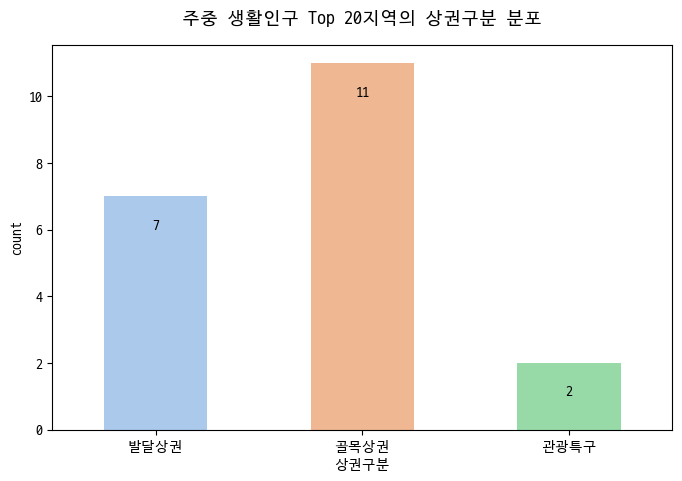

In [104]:
# 주중생활인구 Top 20의 상권구분 분포
plt.rcParams['font.size'] = 10
fig = sns.countplot(x=population_weekdays.reset_index(level=['상권구분','상권명']).상권구분,
                    palette='pastel',
                   width=0.5)
fig.figure.set_size_inches(8,5)
for p in fig.patches:
    fig.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height()-1, # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') # 가운데 정렬
plt.title('주중 생활인구 Top 20지역의 상권구분 분포',fontdict={'fontsize':13},pad=15)
plt.savefig('주중 생활인구 Top 20지역의 상권구분 분포.jpg')
plt.show()

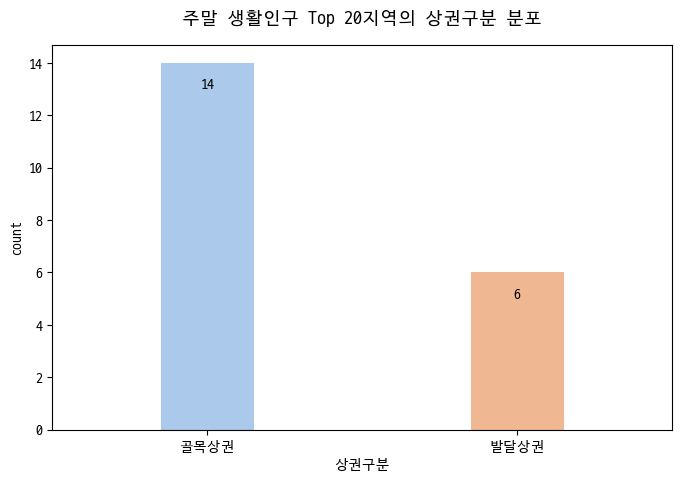

In [105]:
# 주말생활인구 Top 20의 상권구분 분포
fig = sns.countplot(x=population_weekends.reset_index(level=['상권구분','상권명']).상권구분,
                    palette='pastel',
                   width=0.3)
fig.figure.set_size_inches(8,5)
for p in fig.patches:
    fig.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height()-1, # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') # 가운데 정렬
plt.title('주말 생활인구 Top 20지역의 상권구분 분포',fontdict={'fontsize':13},pad=15)
plt.savefig('주말 생활인구 Top 20지역의 상권구분 분포.jpg')
plt.show()

### 가설 검증
- 가설4) 2022년도 생활인구의 평균값이 가장 높은 20곳 중 주중 생활인구 평균값이 높은 곳은 발달상권이 더 많을 것이고 주말 생활인구 평균값이 높은 곳은 골목상권이 더 많을 것이다.<br><br>
    - 주중 평균 생활 인구의 상위 20위에 속하는 상권 중 골목상권에 속하는 상권의 개수가 11개로 가장 많았고 발달 상권이 7개, 관광특구가 2개로 확인되었다.또한, 주말 평균 생활 인구의 상위 20에 속하는 상권 중 골목상권이 14개로 가장 많이 차지하였고, 발달상권은 6개이며 관광특구나 전통시장은 포함되지 않았다.따라서, 주중과 주말 상관없이 평균 생활인구가 가장 많은 20개의 상권 중 골목상권에 속하는 상권이 가장 많은 것으로 확인되어 가설은 틀린 것으로 검증 되었다.